In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
method_replacement_dict = {"difference": "Difference",
                           "initial": "Initial Parameters",
                           "late_em": "Late EM",
                           "pure_competency": "Pure Competency", 
                           "real_early": "Real early Param."}


def parameter_table_model(df, latent_dimension=2, item_dimension=20, aggfunc="median", caption="", decimals=3):
    sub_df = df[(df["latent_dimension"] == 2) & (df["item_dimension"] == 20)]
    n = len(sub_df["key"].unique())
    rmse_columns = ["method", "sample_size", "rmse_early_A", "rmse_early_delta", "rmse_early_sigma",
                    "rmse_late_A", "rmse_late_delta", "rmse_late_sigma", "rmse_psi"]
    sub_df = sub_df[rmse_columns]
    columns = ["Method","Sample size", "$A^e$", "$\Delta^e$", "$\Sigma^e$",
                       "$A^l$", "$\Delta^l$", "$\Sigma^l$", "$\Psi$"]
    sub_df.columns = columns
    sub_df = sub_df.replace(method_replacement_dict)
    parameter_table = sub_df.groupby(["Sample size", "Method"]).agg(aggfunc)
    parameter_table = np.round(parameter_table, decimals)
    print(parameter_table.to_latex(bold_rows=True, multirow=True, 
                                   caption=caption+", n={0}".format(n), 
                                   position="H", escape=False))
    return(parameter_table)

In [3]:
def single_metric_table(df, metric, aggfunc="median", latex=True, decimals=3, caption=""):
    df = df.replace(method_replacement_dict)
    n = np.min(df.groupby(["latent_dimension", "item_dimension", "sample_size"])["method"].value_counts())
    table = pd.crosstab(index=[df["sample_size"], df["method"]],
                columns=[df["latent_dimension"], df["item_dimension"]], 
                values=df[metric], 
                aggfunc=aggfunc)
    table = np.round(table, decimals)
    if latex:
        print(table.to_latex(bold_rows=True, multirow=True, 
                             caption=caption+", n={0}".format(n),
                             position="H"))
    return(table)

In [4]:
def model_boxplot(df, metric='rmse_psi', latent_dimension=2, item_dimension=20, 
                  title="",
                  methods=["late_em", "real_early", "pure_competency", "initial", "difference"]):
    sub_df = df[(df["latent_dimension"] == 2) & (df["item_dimension"] == 20)]
    sub_df = sub_df[(sub_df["method"].isin(methods))]
    sub_df = sub_df.replace(method_replacement_dict)
    n = len(sub_df["key"].unique())
    fig = plt.gcf()
    fig.set_dpi(100)
    fig.set_size_inches(10, 5)
    plt.title(title+", n={0}".format(n))
    sn.boxplot(x=sub_df[metric], hue=sub_df["sample_size"].astype("str"), y=sub_df["method"],
               orient="h")

# Results

## Simulatuion Results

### Full Q Matrix

In [5]:
full_Q_df = pd.read_csv("results/full_q.csv")
full_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-10 00:07:31.028317,late_em,3.23,11.33,10.0,8.0,-185.38,...,1.165435,0.990497,0.024537,1.559702,1.809461,0.234788,0.215032,0.688319,0.794077,0.727562
1,2,10,30,2022-11-10 00:07:31.028317,initial,0.00,0.00,0.0,0.0,-184.83,...,1.813287,0.597970,0.263114,0.694863,1.310203,0.263770,0.354906,0.734315,0.956372,0.741465
2,2,10,30,2022-11-10 00:07:31.028317,difference,2.30,2.82,8.0,9.0,-185.40,...,1.272744,0.822523,0.143401,1.260802,1.624896,0.302993,0.433466,0.682575,1.075948,0.814390
3,2,10,30,2022-11-10 00:07:31.028317,real_early,NaN,28.09,NaN,14.0,NaN,...,NaN,NaN,NaN,8.754521,6.283983,0.295779,0.428182,0.000000,0.796959,0.770830
4,2,10,30,2022-11-10 00:07:31.028317,pure_competency,2.79,11.41,10.0,9.0,-184.90,...,1.397755,1.105351,0.090439,1.471871,1.689261,0.370686,0.630311,0.714685,0.893160,0.810266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,20,30,2022-11-10 08:10:44.932127,late_em,3.91,33.46,7.0,12.0,-273.16,...,3.592408,2.851899,0.057276,3.730399,2.167700,0.487382,0.538773,0.511070,0.694255,0.871827
126,2,20,30,2022-11-10 08:10:44.932127,initial,0.00,0.00,0.0,0.0,-273.21,...,1.713567,0.700953,0.296278,1.392040,1.868734,0.401277,0.353795,0.546066,1.073362,0.802181
127,2,20,30,2022-11-10 08:10:44.932127,difference,4.80,4.28,8.0,7.0,-273.03,...,4.170080,2.344256,0.057276,3.086863,1.495977,0.309728,0.393875,0.507689,0.795098,0.728029
128,2,20,30,2022-11-10 08:10:44.932127,real_early,NaN,20.90,NaN,8.0,NaN,...,NaN,NaN,NaN,3.284674,2.780733,0.427872,0.385587,0.000000,0.716591,0.791901


In [6]:
parameter_table_model(full_Q_df)

\begin{table}[H]
\centering
\caption{, n=7}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &  $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &        &             &             &         \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  4.170 &       1.546 &       0.057 &  1.104 &       1.496 &       0.394 &   0.310 \\
    & \textbf{Initial Parameters} &  1.770 &       0.701 &       0.138 &  1.392 &       1.184 &       0.354 &   0.317 \\
    & \textbf{Late EM} &  3.592 &       1.845 &       0.057 &  2.045 &       1.824 &       0.539 &   0.390 \\
    & \textbf{Pure Competency} &  3.456 &       1.547 &       0.215 &  1.295 &       1.389 &       0.534 &   0.362 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &  3.285 &       2.781 &       0.576 &   0.428 \\
\cline{1-9}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} & 

/tmp/ipykernel_109353/506058024.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$  $A^l$  \
Sample size Method                                                     
30          Difference          4.170       1.546       0.057  1.104   
            Initial Parameters  1.770       0.701       0.138  1.392   
            Late EM             3.592       1.845       0.057  2.045   
            Pure Competency     3.456       1.547       0.215  1.295   
            Real early Param.     NaN         NaN         NaN  3.285   
100         Difference          1.112       0.583       0.024  0.608   
            Initial Parameters  1.993       0.546       0.219  1.391   
            Late EM             1.220       0.529       0.011  0.783   
            Pure Competency     1.064       0.557       0.235  0.863   
            Real early Param.     NaN         NaN         NaN  0.686   
200         Difference          0.633       0.403       0.009  1.101   
            Initial Parameters  1.828       0.512       0.211  2.014   
            Late EM             0.392       0.472       0.031  1.191   
            Pure Competency     0.471       0.444       0.142  0.961   
            Real early Param.     NaN         NaN         NaN  1.128   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               1.496       0.394   0.310  
            Initial Parameters       1.184       0.354   0.317  
            Late EM                  1.824       0.539   0.390  
            Pure Competency          1.389       0.534   0.362  
            Real early Param.        2.781       0.576   0.428  
100         Difference               0.748       0.473   0.282  
            Initial Parameters       1.433       0.355   0.280  
            Late EM                  0.674       0.476   0.410  
            Pure Competency          0.750       0.723   0.422  
            Real early Param.        1.144       0.506   0.329  
200         Difference               0.446       0.395   0.215  
            Initial Parameters       1.584       0.266   0.205  
            Late EM                  0.438       0.231   0.206  
            Pure Competency          1.032       0.502   0.312  
            Real early Param.        0.800       0.483   0.353

In [7]:
single_metric_table(full_Q_df, "rmse_psi", caption="RMSE for Correlations $\Psi$")

\begin{table}[H]
\centering
\caption{RMSE for Correlations $\Psi$, n=1}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.336 &  0.310 &  0.372 &  0.314 \\
    & \textbf{Initial Parameters} &  0.294 &  0.317 &  0.247 &  0.203 \\
    & \textbf{Late EM} &  0.211 &  0.390 &  0.282 &  0.238 \\
    & \textbf{Pure Competency} &  0.385 &  0.362 &  0.324 &  0.284 \\
    & \textbf{Real early Param.} &  0.324 &  0.428 &  0.312 &  0.267 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.316 &  0.282 &  0.255 &  0.266 \\
    & \textbf{Initial Parameters} &  0.236 &  0.280 &  0.292 &  0.268 \\
    & \textbf{Late EM} &  0.257 &  0.410 &  0.167 &  0.278 \\
    & \textbf{Pure Competency} &  0.351 &  0.42

/tmp/ipykernel_109353/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.336  0.310  0.372  0.314
            Initial Parameters  0.294  0.317  0.247  0.203
            Late EM             0.211  0.390  0.282  0.238
            Pure Competency     0.385  0.362  0.324  0.284
            Real early Param.   0.324  0.428  0.312  0.267
100         Difference          0.316  0.282  0.255  0.266
            Initial Parameters  0.236  0.280  0.292  0.268
            Late EM             0.257  0.410  0.167  0.278
            Pure Competency     0.351  0.422  0.236  0.303
            Real early Param.   0.234  0.329  0.228  0.319
200         Difference          0.326  0.215  0.340  0.193
            Initial Parameters  0.277  0.205  0.323  0.209
            Late EM             0.378  0.206  0.234  0.205
            Pure Competency     0.354  0.312  0.284  0.351
            Real early Param.   0.291  0.353  0.251  0.302

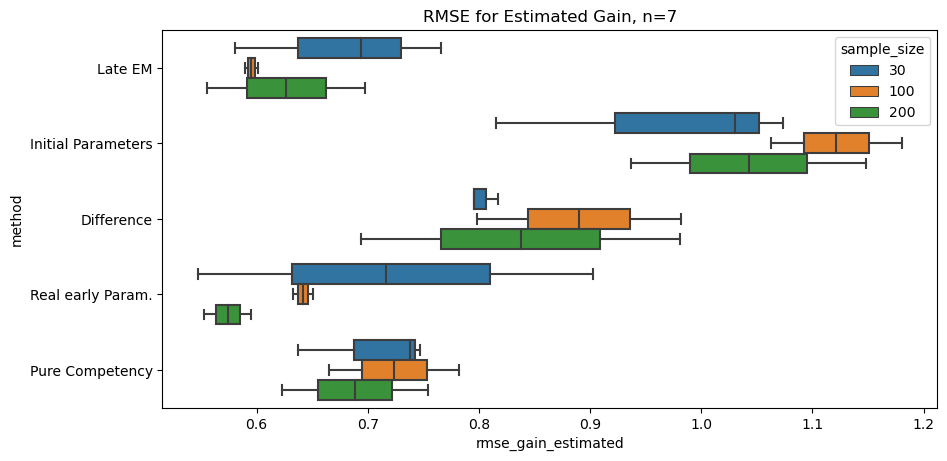

In [8]:
model_boxplot(full_Q_df, metric='rmse_gain_estimated', title="RMSE for Estimated Gain")

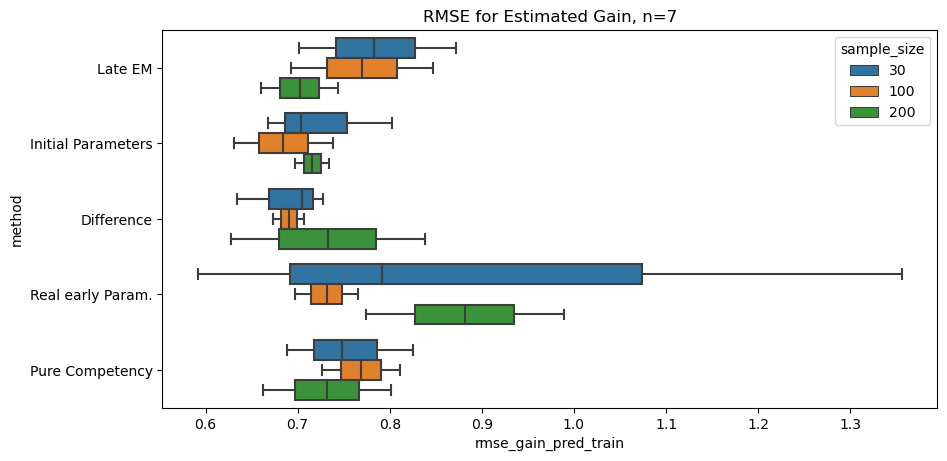

In [11]:
model_boxplot(full_Q_df, metric='rmse_gain_pred_train', title="RMSE for Estimated Gain")

### Seperated Q-Matrix

In [9]:
sep_Q_df = pd.read_csv("results/seperated_q.csv")
sep_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-09 14:13:59.977141,late_em,2.46,6.97,8.0,6.0,-165.55,...,0.871733,0.897408,0.230870,0.578739,0.421377,0.150137,0.111363,0.668068,0.648498,0.602380
1,2,10,30,2022-11-09 14:13:59.977141,initial,0.00,0.00,0.0,0.0,-165.68,...,0.822722,0.524366,0.353553,0.919626,0.556238,0.231157,0.353605,0.776873,0.986678,0.643375
2,2,10,30,2022-11-09 14:13:59.977141,difference,2.21,2.09,8.0,8.0,-165.82,...,0.804284,0.765525,0.269337,0.610905,0.354392,0.367587,0.275833,0.664686,0.983067,0.810406
3,2,10,30,2022-11-09 14:13:59.977141,real_early,NaN,8.16,NaN,7.0,NaN,...,NaN,NaN,NaN,0.507558,0.369690,0.185825,0.345257,0.000000,0.598543,0.713538
4,2,10,30,2022-11-09 14:13:59.977141,pure_competency,1.66,7.96,7.0,7.0,-165.73,...,0.844382,0.759816,0.000000,0.633343,0.352381,0.329273,0.587353,0.668640,0.846396,0.678724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,3,20,200,2022-11-09 17:29:08.421871,late_em,4.57,63.17,6.0,6.0,-2177.60,...,0.324554,0.261302,0.211879,0.226397,0.362822,0.421092,0.547955,0.703410,0.808644,0.865711
1321,3,20,200,2022-11-09 17:29:08.421871,initial,0.00,0.00,0.0,0.0,-2177.69,...,0.617583,0.349889,0.300489,0.918931,0.573969,0.278575,0.287937,0.771374,1.446046,0.796816
1322,3,20,200,2022-11-09 17:29:08.421871,difference,5.44,4.35,7.0,6.0,-2179.07,...,0.300354,0.263080,0.175595,0.220384,0.367540,0.258907,0.196257,0.695262,0.981375,0.862667
1323,3,20,200,2022-11-09 17:29:08.421871,real_early,NaN,68.90,NaN,6.0,NaN,...,NaN,NaN,NaN,0.160468,0.308058,0.446974,0.656306,0.000000,0.964133,1.028932


In [182]:
parameter_table_model(sep_Q_df, caption="Seperated Q-Matrix, Reference Model")

\begin{table}[h]
\centering
\caption{Seperated Q-Matrix, Reference Model, n=15}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &  $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &        &             &             &         \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  1.011 &       0.683 &       0.068 &  1.310 &       1.252 &       0.359 &   0.354 \\
    & \textbf{Initial Parameters} &  0.659 &       0.451 &       0.098 &  0.896 &       0.895 &       0.391 &   0.290 \\
    & \textbf{Late EM} &  1.021 &       0.718 &       0.068 &  2.023 &       1.544 &       0.391 &   0.332 \\
    & \textbf{Pure Competency} &  0.913 &       0.750 &       0.274 &  1.691 &       1.621 &       0.618 &   0.447 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &  2.150 &       1.267 &       0.391 &   0.421 \\
\cline{1-9}
\multirow{5}{*}{\t

/tmp/ipykernel_64351/3400357848.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$  $A^l$  \
Sample size Method                                                     
30          Difference          1.011       0.683       0.068  1.310   
            Initial Parameters  0.659       0.451       0.098  0.896   
            Late EM             1.021       0.718       0.068  2.023   
            Pure Competency     0.913       0.750       0.274  1.691   
            Real early Param.     NaN         NaN         NaN  2.150   
100         Difference          0.478       0.346       0.050  0.256   
            Initial Parameters  0.847       0.325       0.094  0.916   
            Late EM             0.478       0.337       0.050  0.274   
            Pure Competency     0.509       0.347       0.369  0.324   
            Real early Param.     NaN         NaN         NaN  0.343   
200         Difference          0.349       0.230       0.020  0.265   
            Initial Parameters  1.127       0.308       0.216  0.908   
            Late EM             0.375       0.215       0.030  0.249   
            Pure Competency     0.345       0.240       0.138  0.263   
            Real early Param.     NaN         NaN         NaN  0.263   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               1.252       0.359   0.354  
            Initial Parameters       0.895       0.391   0.290  
            Late EM                  1.544       0.391   0.332  
            Pure Competency          1.621       0.618   0.447  
            Real early Param.        1.267       0.391   0.421  
100         Difference               0.488       0.201   0.225  
            Initial Parameters       0.779       0.357   0.300  
            Late EM                  0.563       0.289   0.238  
            Pure Competency          0.412       0.619   0.368  
            Real early Param.        0.514       0.379   0.348  
200         Difference               0.340       0.143   0.338  
            Initial Parameters       0.809       0.354   0.270  
            Late EM                  0.323       0.312   0.291  
            Pure Competency          0.330       0.639   0.416  
            Real early Param.        0.314       0.330   0.220

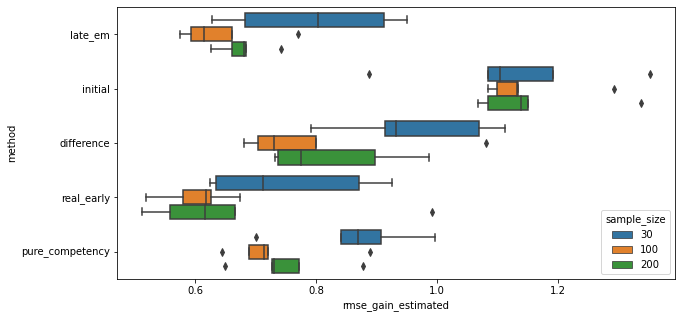

In [170]:
model_boxplot(sep_Q_df, metric='rmse_gain_estimated')

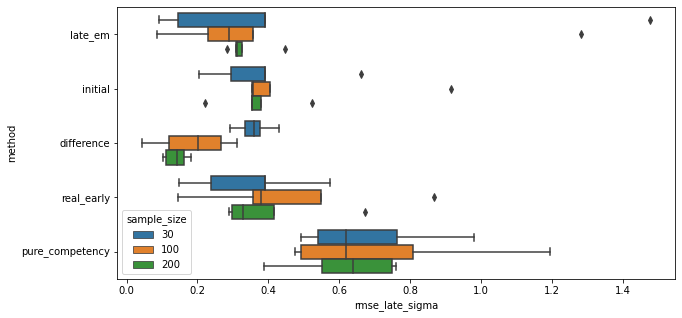

In [180]:
model_boxplot(sep_Q_df, metric='rmse_late_sigma')

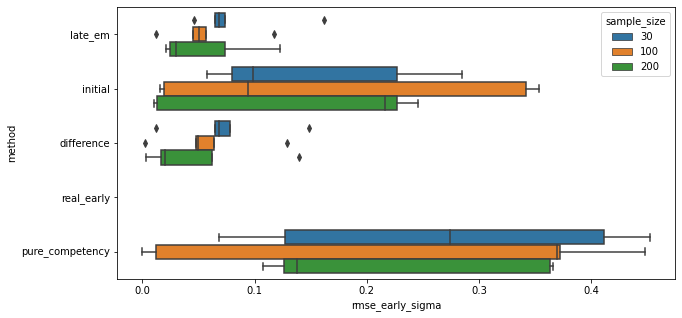

In [181]:
model_boxplot(sep_Q_df, metric='rmse_early_sigma')

### Pyramid Q-Matrix

In [230]:
pyramid_Q_df = pd.read_csv("results/pyramid_q.csv")
pyramid_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-09 17:35:17.900248,late_em,1.91,13.15,7.0,9.0,-165.71,...,1.596647,0.465094,0.000000,3.425927,3.166241,0.240945,0.374053,0.790489,0.739350,0.786535
1,2,10,30,2022-11-09 17:35:17.900248,initial,0.00,0.00,0.0,0.0,-166.23,...,1.629778,0.467686,0.353553,0.992341,1.115417,0.390831,0.384126,0.807575,0.961204,0.746710
2,2,10,30,2022-11-09 17:35:17.900248,difference,2.22,2.92,8.0,10.0,-165.83,...,1.710161,0.479138,0.000050,1.546724,1.558083,0.369769,0.226440,0.817012,0.928635,0.850655
3,2,10,30,2022-11-09 17:35:17.900248,real_early,NaN,7.36,NaN,6.0,NaN,...,NaN,NaN,NaN,2.518091,3.559138,0.482771,0.763990,0.000000,0.877311,0.954047
4,2,10,30,2022-11-09 17:35:17.900248,pure_competency,1.82,12.02,7.0,9.0,-165.61,...,1.614004,0.420618,0.000000,3.001575,2.919017,0.483658,0.687210,0.798692,0.899857,0.780534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,20,200,2022-11-09 22:52:16.599546,late_em,6.35,109.75,7.0,8.0,-1875.54,...,0.919388,0.302120,0.155194,0.792254,0.813577,0.252295,0.299479,0.613301,0.725456,0.872102
296,3,20,200,2022-11-09 22:52:16.599546,initial,0.00,0.00,0.0,0.0,-1873.99,...,1.608294,0.493561,0.333753,1.434783,1.407031,0.252301,0.299499,0.759959,1.224014,0.887221
297,3,20,200,2022-11-09 22:52:16.599546,difference,7.31,7.13,8.0,8.0,-1873.42,...,0.896023,0.317678,0.142570,0.826298,0.399761,0.238742,0.138670,0.608472,0.767908,0.862114
298,3,20,200,2022-11-09 22:52:16.599546,real_early,NaN,103.18,NaN,7.0,NaN,...,NaN,NaN,NaN,0.918357,1.277033,0.419103,0.476989,0.000000,0.817196,1.019666


In [231]:
parameter_table_model(full_Q_df, caption="Pyramid-Q-Matrix, RMSE Median of Parameter Recovery")

\begin{table}[h]
\centering
\caption{Pyramid-Q-Matrix, RMSE Median of Parameter Recovery, n=16}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &   $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &         &             &             &         \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  3.061 &       1.670 &       0.041 &   3.050 &       3.185 &       0.202 &   0.185 \\
    & \textbf{Initial Parameters} &  2.877 &       0.596 &       0.125 &   4.269 &       1.820 &       0.354 &   0.405 \\
    & \textbf{Late EM} &  2.698 &       1.746 &       0.028 &  11.548 &      20.463 &       0.221 &   0.205 \\
    & \textbf{Pure Competency} &  2.520 &       1.853 &       0.229 &   2.781 &       5.619 &       0.443 &   0.310 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &   9.647 &      11.200 &       0.332 &   0.275 \\
\cline{

/tmp/ipykernel_64351/3400357848.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$   $A^l$  \
Sample size Method                                                      
30          Difference          3.061       1.670       0.041   3.050   
            Initial Parameters  2.877       0.596       0.125   4.269   
            Late EM             2.698       1.746       0.028  11.548   
            Pure Competency     2.520       1.853       0.229   2.781   
            Real early Param.     NaN         NaN         NaN   9.647   
100         Difference          1.121       0.555       0.144   0.624   
            Initial Parameters  2.387       0.525       0.179   1.183   
            Late EM             1.155       0.589       0.151   0.677   
            Pure Competency     0.987       0.629       0.175   0.681   
            Real early Param.     NaN         NaN         NaN   0.645   
200         Difference          1.408       0.765       0.082   0.515   
            Initial Parameters  2.869       0.730       0.241   1.363   
            Late EM             1.107       0.781       0.062   0.900   
            Pure Competency     1.263       0.711       0.254   0.664   
            Real early Param.     NaN         NaN         NaN   1.055   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               3.185       0.202   0.185  
            Initial Parameters       1.820       0.354   0.405  
            Late EM                 20.463       0.221   0.205  
            Pure Competency          5.619       0.443   0.310  
            Real early Param.       11.200       0.332   0.275  
100         Difference               0.531       0.118   0.252  
            Initial Parameters       1.305       0.368   0.273  
            Late EM                  0.423       0.318   0.292  
            Pure Competency          0.851       0.731   0.450  
            Real early Param.        0.573       0.383   0.308  
200         Difference               0.610       0.120   0.203  
            Initial Parameters       0.943       0.462   0.356  
            Late EM                  1.383       0.417   0.312  
            Pure Competency          0.990       0.745   0.463  
            Real early Param.        1.533       0.621   0.380

In [232]:
single_metric_table(pyramid_Q_df, "rmse_psi", caption="RMSE for Correlations $\Psi$")

\begin{table}[H]
\centering
\caption{RMSE for Correlations $\Psi$, n=5}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.370 &  0.456 &  0.370 &  0.272 \\
    & \textbf{Initial Parameters} &  0.279 &  0.406 &  0.276 &  0.259 \\
    & \textbf{Late EM} &  0.241 &  0.261 &  0.360 &  0.259 \\
    & \textbf{Pure Competency} &  0.398 &  0.517 &  0.357 &  0.330 \\
    & \textbf{Real early Param.} &  0.224 &  0.414 &  0.368 &  0.306 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.233 &  0.315 &  0.349 &  0.328 \\
    & \textbf{Initial Parameters} &  0.300 &  0.344 &  0.288 &  0.300 \\
    & \textbf{Late EM} &  0.332 &  0.363 &  0.253 &  0.318 \\
    & \textbf{Pure Competency} &  0.400 &  0.39

/tmp/ipykernel_64351/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.370  0.456  0.370  0.272
            Initial Parameters  0.279  0.406  0.276  0.259
            Late EM             0.241  0.261  0.360  0.259
            Pure Competency     0.398  0.517  0.357  0.330
            Real early Param.   0.224  0.414  0.368  0.306
100         Difference          0.233  0.315  0.349  0.328
            Initial Parameters  0.300  0.344  0.288  0.300
            Late EM             0.332  0.363  0.253  0.318
            Pure Competency     0.400  0.397  0.397  0.379
            Real early Param.   0.290  0.344  0.407  0.303
200         Difference          0.307  0.243  0.250  0.270
            Initial Parameters  0.208  0.290  0.230  0.250
            Late EM             0.202  0.299  0.362  0.264
            Pure Competency     0.370  0.439  0.320  0.335
            Real early Param.   0.300  0.310  0.317  0.417

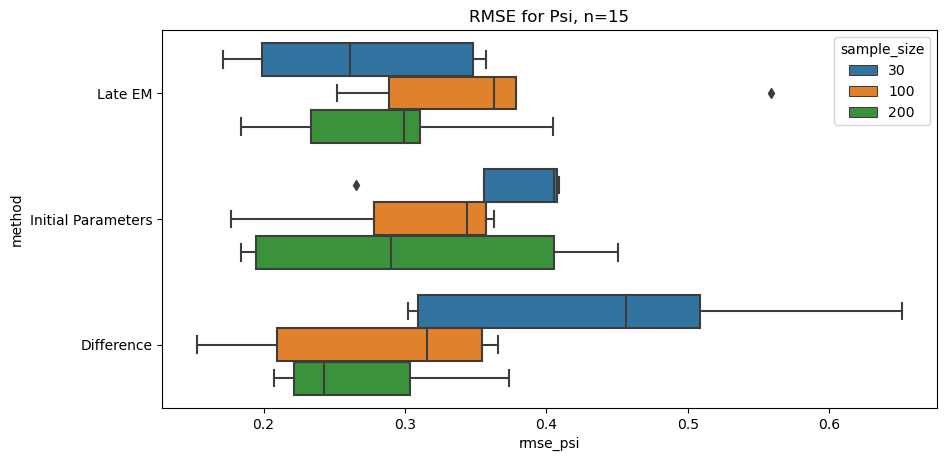

In [236]:
model_boxplot(pyramid_Q_df, metric="rmse_psi", methods=["late_em", "initial", "difference"], title="RMSE for Psi")

## Experiment 2: Prediction of Competency Gain

In [185]:
single_metric_table(full_Q_df, "rmse_theta", caption="Median RMSE for the estimation of $\\theta$")

\begin{table}
\centering
\caption{RMSE for the estimation of $\theta$, n=5}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.513 &  0.485 &  0.514 &  0.540 \\
    & \textbf{Initial Parameters} &  0.560 &  0.571 &  0.589 &  0.597 \\
    & \textbf{Late EM} &  0.515 &  0.479 &  0.519 &  0.539 \\
    & \textbf{Pure Competency} &  0.528 &  0.495 &  0.521 &  0.575 \\
    & \textbf{Real early Param.} &  0.000 &  0.000 &  0.000 &  0.000 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.533 &  0.501 &  0.502 &  0.469 \\
    & \textbf{Initial Parameters} &  0.581 &  0.591 &  0.555 &  0.551 \\
    & \textbf{Late EM} &  0.532 &  0.508 &  0.506 &  0.472 \\
    & \textbf{Pure Competency} &  0.519 &  

/tmp/ipykernel_64351/2909151251.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True, caption=caption+", n={0}".format(n)))


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.513  0.485  0.514  0.540
            Initial Parameters  0.560  0.571  0.589  0.597
            Late EM             0.515  0.479  0.519  0.539
            Pure Competency     0.528  0.495  0.521  0.575
            Real early Param.   0.000  0.000  0.000  0.000
100         Difference          0.533  0.501  0.502  0.469
            Initial Parameters  0.581  0.591  0.555  0.551
            Late EM             0.532  0.508  0.506  0.472
            Pure Competency     0.519  0.533  0.529  0.492
            Real early Param.   0.000  0.000  0.000  0.000
200         Difference          0.440  0.452  0.462  0.615
            Initial Parameters  0.533  0.575  0.582  0.668
            Late EM             0.442  0.451  0.465  0.608
            Pure Competency     0.459  0.484  0.472  0.636
            Real early Param.   0.000  0.000  0.000  0.000

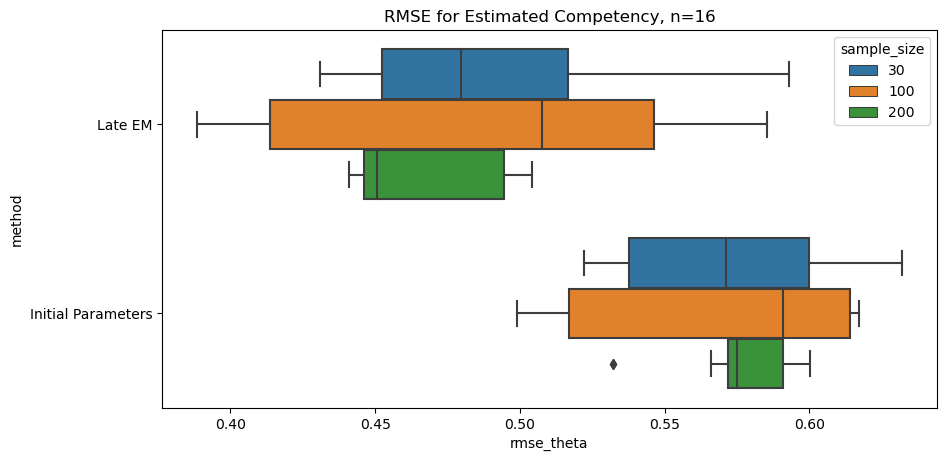

In [222]:
model_boxplot(full_Q_df, metric="rmse_theta", methods=["late_em", "initial"], title="RMSE for Estimated Competency")

In [189]:
single_metric_table(full_Q_df, "rmse_gain_estimated", caption="Median RMSE for Competency Gain Estimation")

\begin{table}[H]
\centering
\caption{Median RMSE for Competency Gain Estimation, n=5}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.700 &  0.630 &  0.739 &  0.754 \\
    & \textbf{Initial Parameters} &  0.820 &  0.864 &  0.952 &  0.944 \\
    & \textbf{Late EM} &  0.633 &  0.593 &  0.689 &  0.701 \\
    & \textbf{Pure Competency} &  0.744 &  0.658 &  0.722 &  0.729 \\
    & \textbf{Real early Param.} &  0.660 &  0.645 &  0.704 &  0.720 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.789 &  0.676 &  0.702 &  0.736 \\
    & \textbf{Initial Parameters} &  0.884 &  0.998 &  0.959 &  0.878 \\
    & \textbf{Late EM} &  0.626 &  0.627 &  0.687 &  0.679 \\
    & \textbf{Pure Competency} & 

/tmp/ipykernel_64351/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.700  0.630  0.739  0.754
            Initial Parameters  0.820  0.864  0.952  0.944
            Late EM             0.633  0.593  0.689  0.701
            Pure Competency     0.744  0.658  0.722  0.729
            Real early Param.   0.660  0.645  0.704  0.720
100         Difference          0.789  0.676  0.702  0.736
            Initial Parameters  0.884  0.998  0.959  0.878
            Late EM             0.626  0.627  0.687  0.679
            Pure Competency     0.756  0.705  0.701  0.717
            Real early Param.   0.689  0.613  0.670  0.683
200         Difference          0.656  0.682  0.690  0.828
            Initial Parameters  0.890  1.005  0.915  1.145
            Late EM             0.641  0.606  0.679  0.750
            Pure Competency     0.644  0.682  0.726  0.776
            Real early Param.   0.651  0.623  0.606  0.772

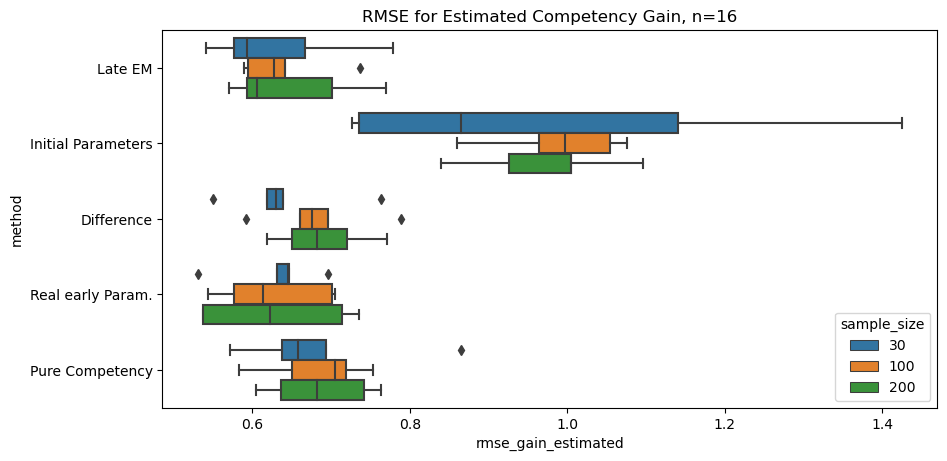

In [224]:
model_boxplot(full_Q_df, metric="rmse_gain_estimated", title="RMSE for Estimated Competency Gain")

In [191]:
single_metric_table(full_Q_df, "rmse_gain_pred_train", caption="Median RMSE for Competency Gain Prediction")

\begin{table}[H]
\centering
\caption{Median RMSE for Competency Gain Prediction, n=5}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.746 &  0.665 &  0.816 &  0.832 \\
    & \textbf{Initial Parameters} &  0.836 &  0.764 &  0.782 &  0.787 \\
    & \textbf{Late EM} &  0.819 &  0.724 &  0.767 &  0.823 \\
    & \textbf{Pure Competency} &  0.845 &  0.785 &  0.820 &  0.834 \\
    & \textbf{Real early Param.} &  0.829 &  0.728 &  0.860 &  0.904 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.750 &  0.725 &  0.800 &  0.831 \\
    & \textbf{Initial Parameters} &  0.746 &  0.724 &  0.791 &  0.756 \\
    & \textbf{Late EM} &  0.708 &  0.705 &  0.794 &  0.779 \\
    & \textbf{Pure Competency} & 

/tmp/ipykernel_64351/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.746  0.665  0.816  0.832
            Initial Parameters  0.836  0.764  0.782  0.787
            Late EM             0.819  0.724  0.767  0.823
            Pure Competency     0.845  0.785  0.820  0.834
            Real early Param.   0.829  0.728  0.860  0.904
100         Difference          0.750  0.725  0.800  0.831
            Initial Parameters  0.746  0.724  0.791  0.756
            Late EM             0.708  0.705  0.794  0.779
            Pure Competency     0.793  0.834  0.804  0.826
            Real early Param.   0.696  0.723  0.852  0.906
200         Difference          0.723  0.789  0.768  0.829
            Initial Parameters  0.718  0.816  0.728  0.773
            Late EM             0.692  0.757  0.741  0.774
            Pure Competency     0.739  0.888  0.798  0.820
            Real early Param.   0.786  0.893  0.767  0.898

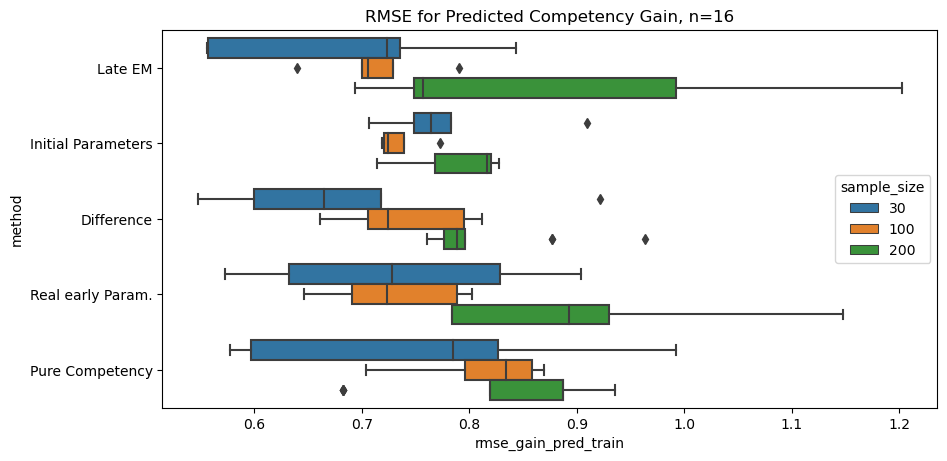

In [225]:
model_boxplot(full_Q_df, metric="rmse_gain_pred_train", title="RMSE for Predicted Competency Gain")

### CSEDM Data
base: uirt_lfa_model_csedm_final.ipynb

In [226]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from os import path

ModuleNotFoundError: No module named 'ProgSnap2'